In [1]:
# we shall start early for the project

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('500cities_yrajes2.zip')
example = df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 24 columns):
Year                          810103 non-null int64
StateAbbr                     810103 non-null object
StateDesc                     810103 non-null object
CityName                      810047 non-null object
GeographicLevel               810103 non-null object
DataSource                    810103 non-null object
Category                      810103 non-null object
UniqueID                      810103 non-null object
Measure                       810103 non-null object
Data_Value_Unit               810103 non-null object
DataValueTypeID               810103 non-null object
Data_Value_Type               810103 non-null object
Data_Value                    787311 non-null float64
Low_Confidence_Limit          787311 non-null float64
High_Confidence_Limit         787311 non-null float64
Data_Value_Footnote_Symbol    22794 non-null object
Data_Value_Footnote           22794 non-

In [5]:
df.dtypes

Year                            int64
StateAbbr                      object
StateDesc                      object
CityName                       object
GeographicLevel                object
DataSource                     object
Category                       object
UniqueID                       object
Measure                        object
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
PopulationCount                 int64
GeoLocation                    object
CategoryID                     object
MeasureId                      object
CityFIPS                      float64
TractFIPS                     float64
Short_Question_Text            object
dtype: object

In [6]:
df.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,14.9,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
1,2016,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,11.8,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
2,2016,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,...,23.2,NaN,NaN,308745538,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis


In [7]:
df['Category'].value_counts()

Health Outcomes        376673
Prevention             288400
Unhealthy Behaviors    145030
Name: Category, dtype: int64

In [8]:
df.columns

Index([u'Year', u'StateAbbr', u'StateDesc', u'CityName', u'GeographicLevel',
       u'DataSource', u'Category', u'UniqueID', u'Measure', u'Data_Value_Unit',
       u'DataValueTypeID', u'Data_Value_Type', u'Data_Value',
       u'Low_Confidence_Limit', u'High_Confidence_Limit',
       u'Data_Value_Footnote_Symbol', u'Data_Value_Footnote',
       u'PopulationCount', u'GeoLocation', u'CategoryID', u'MeasureId',
       u'CityFIPS', u'TractFIPS', u'Short_Question_Text'],
      dtype='object')

In [9]:
df.Measure.unique()

array(['Current lack of health insurance among adults aged 18\xe2\x80\x9364 Years',
       'Arthritis among adults aged >=18 Years',
       'Binge drinking among adults aged >=18 Years',
       'High blood pressure among adults aged >=18 Years',
       'Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure',
       'Cancer (excluding skin cancer) among adults aged >=18 Years',
       'Current asthma among adults aged >=18 Years',
       'Coronary heart disease among adults aged >=18 Years',
       'Visits to doctor for routine checkup within the past Year among adults aged >=18 Years',
       'Cholesterol screening among adults aged >=18 Years',
       'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50\xe2\x80\x9375 Years',
       'Chronic obstructive pulmonary disease among adults aged >=18 Years',
       'Papanicolaou smear use among adult women aged 21\xe2\x80\x9365 Years',
       'Older adult men aged >=65 Ye

EDA: Contains values for 28 separate health measures for various cities across the US

In [10]:
# obesity = df[df.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years']
# obesity.groupby('StateAbbr').Data_Value.mean()

In [11]:
df['GeographicLevel'].value_counts()

Census Tract    782047
City             28000
US                  56
Name: GeographicLevel, dtype: int64

In [12]:
df.shape

(810103, 24)

EDA: The dataset contains various health metrics for over 28,000 different census tracts within the 500 largest cities in America.
The data-set is around 800,000+ rows because each of the 28,000+ census-tracts have a row for each of the 20+ metrics collected, and the 500 cities that contain these census tracts each have a row for the average values of each of those same 20+ metrics.

Data Preparation: We represent each of the 28,000+ census-tracts as an individual row, and have a separate column for each health-measurement within the row.
Mask the data-frame to isolate either the city-level data or the census-tract-level data. 
We will further see how we use census-level-data to get correation of various health measures. Also, we will use city-level data to find some patterns concerning poor health and investigate if the lack of health insurance actually causes poor health outcomes, or are there other factors playing a dominant role too. 
So, per Capita Income of the States is used to check if income affects poor health outcomes.


Below, we are targeting census-tract-level data:

In [13]:
census_data = df[df["GeographicLevel"] == "Census Tract"] 
#census_data

In [14]:
 cities_data =df[df["GeographicLevel"] == "City"] 
# cities_data.info()
cities_data.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
56,2016,AL,Alabama,Birmingham,City,BRFSS,Prevention,0107000,Current lack of health insurance among adults ...,%,...,19.9,NaN,NaN,212237,"(33.5275663773, -86.7988174678)",PREVENT,ACCESS2,107000.0,NaN,Health Insurance
57,2016,AL,Alabama,Birmingham,City,BRFSS,Prevention,0107000,Current lack of health insurance among adults ...,%,...,19.5,NaN,NaN,212237,"(33.5275663773, -86.7988174678)",PREVENT,ACCESS2,107000.0,NaN,Health Insurance
156,2016,AL,Alabama,Birmingham,City,BRFSS,Health Outcomes,0107000,Arthritis among adults aged >=18 Years,%,...,29.4,NaN,NaN,212237,"(33.5275663773, -86.7988174678)",HLTHOUT,ARTHRITIS,107000.0,NaN,Arthritis


In [15]:
census_data.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
58,2016,AL,Alabama,Birmingham,Census Tract,BRFSS,Prevention,0107000-01073000100,Current lack of health insurance among adults ...,%,...,26.3,NaN,NaN,3042,"(33.5794328326, -86.7228323926)",PREVENT,ACCESS2,107000.0,1.073000e+09,Health Insurance
59,2016,AL,Alabama,Birmingham,Census Tract,BRFSS,Prevention,0107000-01073000300,Current lack of health insurance among adults ...,%,...,31.7,NaN,NaN,2735,"(33.5428208686, -86.752433978)",PREVENT,ACCESS2,107000.0,1.073000e+09,Health Insurance
60,2016,AL,Alabama,Birmingham,Census Tract,BRFSS,Prevention,0107000-01073000400,Current lack of health insurance among adults ...,%,...,27.6,NaN,NaN,3338,"(33.5632449633, -86.7640474064)",PREVENT,ACCESS2,107000.0,1.073000e+09,Health Insurance


All of the health measures that were collected (e.g. “Chronic kidney disease among adults aged ≥18 Years”); 
Note that there are 28,004 of each measurement, one for each census-tract represented in the data-set.

In [16]:
census_data.columns

Index([u'Year', u'StateAbbr', u'StateDesc', u'CityName', u'GeographicLevel',
       u'DataSource', u'Category', u'UniqueID', u'Measure', u'Data_Value_Unit',
       u'DataValueTypeID', u'Data_Value_Type', u'Data_Value',
       u'Low_Confidence_Limit', u'High_Confidence_Limit',
       u'Data_Value_Footnote_Symbol', u'Data_Value_Footnote',
       u'PopulationCount', u'GeoLocation', u'CategoryID', u'MeasureId',
       u'CityFIPS', u'TractFIPS', u'Short_Question_Text'],
      dtype='object')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


# Boxplot for each health measure in the dataset grouped by category

In [18]:
# census_data['Data_Value']

It shows the range of values associated with each health measure. 
Each boxplot is built from 500 values, one value for each city.

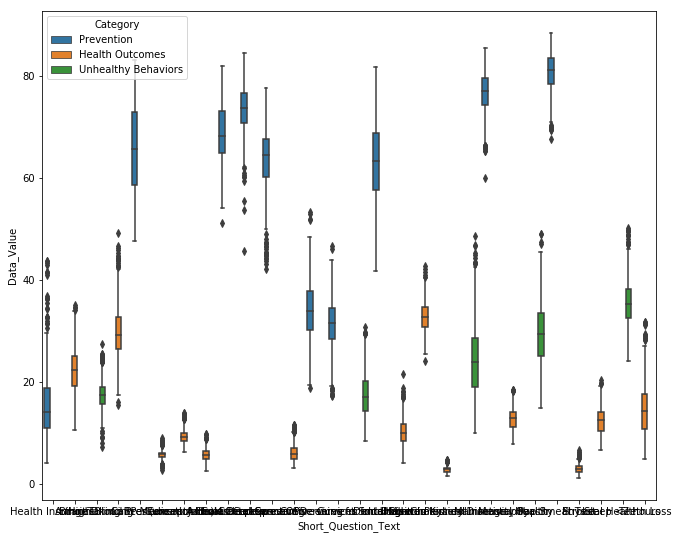

In [19]:
city_data = df[df["GeographicLevel"] == "City"] 
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x='Short_Question_Text',y='Data_Value',hue='Category', data= city_data, orient='v')
# plt.show()



EDA/Visualization Summary: The boxplots show a wide distribution for most of the measures, especially among the preventive measures.

# Correlation Plot (Heat Map)

We try to analyze dependence between health measures by coming up with a correlation matrix where 1 means perfectly positively correlated and -1 means perfectly negatively correlated. To compute the correlations, we will use data at the Census Tract level which is the smallest geographic level. The correlation plot will compare the measure values at each Census Tract to determine their correlation coefficient.

In [20]:
census_data_subset = census_data[['UniqueID','Short_Question_Text','Data_Value']]
# census_data_subset.head()
census_measure_pivot = census_data_subset.pivot(index='UniqueID', columns='Short_Question_Text', values='Data_Value')

census_measure_pivot.dropna(axis=0, inplace=True)
# census_measure_pivot.info()

In [21]:
# census_data_subset
# census_measure_pivot

In [22]:
corr_matrix = census_measure_pivot.corr()
corr_matrix

Short_Question_Text,Annual Checkup,Arthritis,Binge Drinking,COPD,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,Core preventive services for older men,Core preventive services for older women,...,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
Short_Question_Text,,,,,,,,,,,,,,,,,,,,,
Annual Checkup,1.000000,0.591724,-0.309609,0.406256,0.449282,0.471423,0.417428,0.143756,-0.046531,-0.035382,...,0.510619,0.013872,0.291719,0.314261,0.223487,0.299373,0.393599,0.493291,0.721865,0.201268
Arthritis,0.591724,1.000000,-0.568113,0.814986,0.653886,0.241359,0.758520,-0.124324,-0.116552,-0.232854,...,-0.013273,0.325706,0.565349,0.059124,0.636395,0.505073,0.350061,0.795415,0.816627,0.488874
Binge Drinking,-0.309609,-0.568113,1.000000,-0.628285,-0.203517,0.110283,-0.735702,0.437973,0.466852,0.449046,...,0.024878,-0.451111,-0.519731,0.201479,-0.680166,-0.658402,-0.470215,-0.689693,-0.462863,-0.569463
COPD,0.406256,0.814986,-0.628285,1.000000,0.225306,-0.215171,0.880118,-0.539082,-0.493544,-0.594354,...,-0.017500,0.753311,0.760557,-0.099063,0.910166,0.806956,0.628477,0.911767,0.515451,0.842933
Cancer (except skin),0.449282,0.653886,-0.203517,0.225306,1.000000,0.717111,0.233559,0.477969,0.414735,0.355826,...,-0.088463,-0.393343,-0.146650,0.142504,-0.026409,-0.158413,-0.318269,0.232134,0.715752,-0.225410
Cholesterol Screening,0.471423,0.241359,0.110283,-0.215171,0.717111,1.000000,-0.179395,0.750334,0.557483,0.643997,...,0.217867,-0.724126,-0.412061,0.429846,-0.426762,-0.485579,-0.368323,-0.143527,0.536737,-0.597371
Chronic Kidney Disease,0.417428,0.758520,-0.735702,0.880118,0.233559,-0.179395,1.000000,-0.567511,-0.612372,-0.679334,...,0.042890,0.636150,0.735575,-0.037198,0.908747,0.831393,0.609394,0.966799,0.562532,0.791750
Colorectal Cancer Screening,0.143756,-0.124324,0.437973,-0.539082,0.477969,0.750334,-0.567511,1.000000,0.748756,0.834773,...,0.267110,-0.802232,-0.639113,0.380009,-0.757866,-0.827993,-0.581336,-0.496545,0.118593,-0.783666
Core preventive services for older men,-0.046531,-0.116552,0.466852,-0.493544,0.414735,0.557483,-0.612372,0.748756,1.000000,0.841905,...,-0.084308,-0.700636,-0.552946,0.140485,-0.694612,-0.736027,-0.706574,-0.559540,0.047718,-0.698918


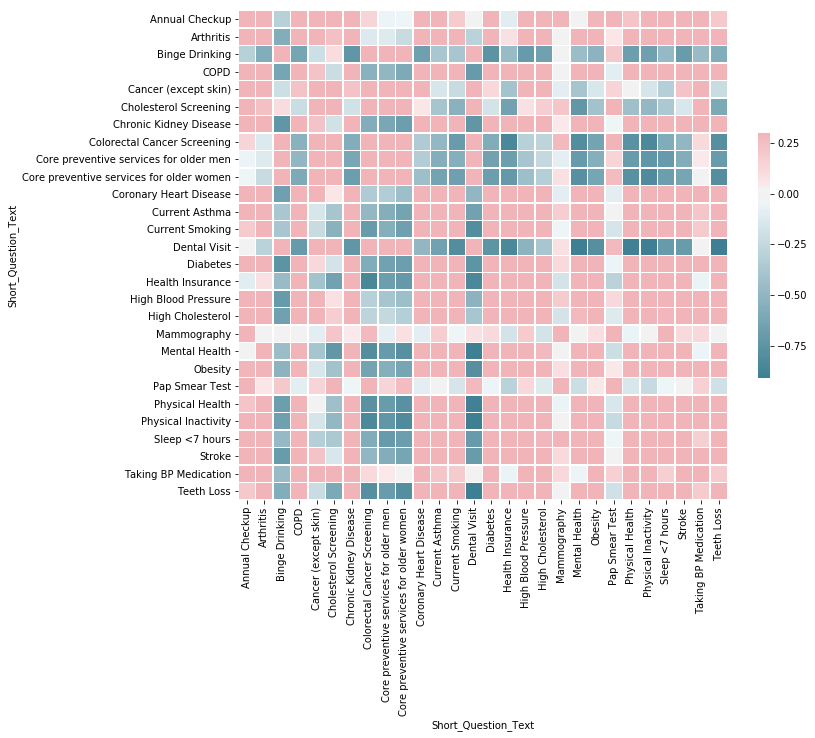

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Observation from correlation plot :
    
1. Binge drinking is negatively correlated with many of the poor health outcomes (e.g. obesity, high cholesterol, stroke, diabetes).
=> My first thought on this is that binge drinking is more common among young people who generally don’t have as many health issues as older people. However we would need to analyze data on binge drinking more extensively to derive solid conclusions.
2. Lack of health insurance is positively correlated with negative health outcomes (i.e. people without health insurance experience worse health outcomes). 
=> This is interesting although not surprising.

# Histogram - Health Insurance

In [24]:
#build a histogram for health insurance across the dataset by city.
stats_city_health_insurance = city_data[(city_data['Short_Question_Text']=='Health Insurance') 
                                        & (city_data['DataValueTypeID'] == 'AgeAdjPrv')]

In [25]:
# stats_city_health_insurance[stats_city_health_insurance['DataValueTypeID'] == 'AgeAdjPrv']
stats_city_health_insurance['Data_Value'].describe()


count    500.000000
mean      15.528800
std        6.210797
min        4.400000
25%       11.100000
50%       14.200000
75%       18.900000
max       43.700000
Name: Data_Value, dtype: float64

There is a wide range of health insurance coverage across the cities in the dataset with a difference between the best and worst of about 40 percent.

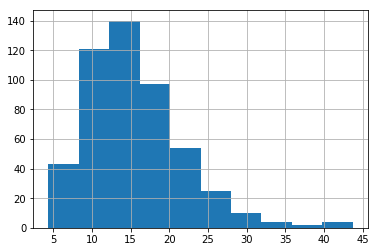

In [26]:
ax = stats_city_health_insurance['Data_Value'].hist()

The histogram shows the data is skewed to the right.

Now, We try to find the cities which have the highest percentage of their population lacking health insurance.

In [27]:
stats_city_least_healthinsurance = stats_city_health_insurance.sort_values('Data_Value', ascending=False)

In [28]:
stats_city_least_healthinsurance[['CityName','StateAbbr','Data_Value']].head(20)

,CityName,StateAbbr,Data_Value
243987,Hialeah,FL,43.7
742305,Pharr,TX,43.3
682284,Brownsville,TX,41.4
730007,Laredo,TX,41.0
738987,Mission,TX,36.5
254464,Miami,FL,36.3
698094,Edinburg,TX,35.5
735511,McAllen,TX,34.4
740771,Pasadena,TX,32.8
698514,El Paso,TX,32.7


EDA: In Hialeah,FL nearly half of their population lacks health insurance and Texas leads the way with 8 of top 10 cities.

=>Texas is a large state and they may simply have more cities in the dataset than other states. 



Now, we will calculate the ratio of cities from each state in the top 100 with regards to lack of health insurance in comparison to the total number of cities in the dataset. The steps to complete this calculation are:

1. Select the top 100 cities by lack of health insurance
2. Count cities in the top 100 for each state
3. Count the total cities in the dataset for each state
4. Divide the number of cities in the top 100 by the total number of cities in the dataset

In [29]:
#Select the top 100 cities by lack of health insurance
top_100_lacking_insurance = stats_city_least_healthinsurance[:100]

In [30]:
grouped_state_top100 = top_100_lacking_insurance.groupby('StateDesc').count()

We can see Texas and California lead the way with the most cities in the top 100. This makes sense because they are two of the largest states.

In [31]:
#Count the total cities in the dataset for each state
grouped_state = stats_city_health_insurance.groupby('StateDesc').count()

In [32]:
grouped_state.head(5)

,Year,StateAbbr,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
StateDesc,,,,,,,,,,,,,,,,,,,,,
Alabama,6,6,6,6,6,6,6,6,6,6,...,6,0,0,6,6,6,6,6,0,6
Alaska,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,0,1
Arizona,12,12,12,12,12,12,12,12,12,12,...,12,0,0,12,12,12,12,12,0,12
Arkansas,5,5,5,5,5,5,5,5,5,5,...,5,0,0,5,5,5,5,5,0,5
California,121,121,121,121,121,121,121,121,121,121,...,121,0,0,121,121,121,121,121,0,121


Now, we will divide the number of cities in the top 100 by the total number of cities in the dataset to create a more accurate comparison of states.

In [33]:
grouped_state_top100['CityName']

StateDesc
Arizona           1
California       14
Colorado          1
Florida          25
Georgia           5
Idaho             1
Illinois          2
Indiana           1
Kansas            1
Massachusetts     1
Mississippi       2
Nevada            1
New Jersey        7
North Carolin     1
Pennsylvania      1
South Carolin     1
Texas            33
Utah              1
Washington        1
Name: CityName, dtype: int64

In [34]:
grouped_state['CityName']

StateDesc
Alabama            6
Alaska             1
Arizona           12
Arkansas           5
California       121
Colorado          14
Connecticut        8
Delaware           1
District of C      1
Florida           33
Georgia           11
Hawaii             1
Idaho              3
Illinois          18
Indiana           11
Iowa               6
Kansas             6
Kentucky           2
Louisiana          6
Maine              1
Maryland           1
Massachusetts     13
Michigan          16
Minnesota          7
Mississippi        2
Missouri           8
Montana            2
Nebraska           2
Nevada             5
New Hampshire      2
New Jersey         9
New Mexico         4
New York           9
North Carolin     14
North Dakota       1
Ohio               9
Oklahoma           6
Oregon             8
Pennsylvania       7
Rhode Island       4
South Carolin      5
South Dakota       2
Tennessee          6
Texas             47
Utah               9
Vermont            1
Virginia          11
Was

In [35]:
grouped_state.keys()

Index([u'Year', u'StateAbbr', u'CityName', u'GeographicLevel', u'DataSource',
       u'Category', u'UniqueID', u'Measure', u'Data_Value_Unit',
       u'DataValueTypeID', u'Data_Value_Type', u'Data_Value',
       u'Low_Confidence_Limit', u'High_Confidence_Limit',
       u'Data_Value_Footnote_Symbol', u'Data_Value_Footnote',
       u'PopulationCount', u'GeoLocation', u'CategoryID', u'MeasureId',
       u'CityFIPS', u'TractFIPS', u'Short_Question_Text'],
      dtype='object')

New Jersey leads the way with nearly 80% of their cities in the top 100. I would be curious as to why New Jersey lacks health insurance. I would also be curious if the lack of health insurance actually causes poor health outcomes, or if there are other factors in play.

# Scraping PerCapita Income of all states from Wikipedia

In [36]:
df_income = pd.read_html('https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income')

In [37]:
df_income = df_income[1]

In [38]:
df_income.head()

,Rank,County-equivalent,State,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,New York County,New York,"$62,498","$69,659","$84,627",1605272.0,736192.0
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244",214861.0,94454.0
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857",12731.0,5020.0
3,4,Marin,California,"$56,791","$90,839","$117,357",254643.0,102912.0
4,5,Alexandria City,Virginia,"$54,608","$85,706","$107,511",143684.0,65369.0


In [39]:
df_income.columns

Index([u'Rank', u'County-equivalent', u'State', u'Per capitaincome',
       u'Medianhouseholdincome', u'Medianfamilyincome', u'Population',
       u'Number ofhouseholds'],
      dtype='object')

In [40]:
df_income.rename(columns={0:'Rank',
                          1:'County equivalent',
                          2:'State',3:'Per Capita Income',4:'Median Household Income',5:'Median Family Income',
                          6:'Population',7:'Number of Households'}, 
                 inplace=True)

In [41]:
df_income.columns

Index([u'Rank', u'County-equivalent', u'State', u'Per capitaincome',
       u'Medianhouseholdincome', u'Medianfamilyincome', u'Population',
       u'Number ofhouseholds'],
      dtype='object')

In [42]:
df_income = df_income.iloc[1:]

In [43]:
df_income = df_income.reset_index(drop=True)

In [44]:
df_income.head(3)

,Rank,County-equivalent,State,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,2,Arlington,Virginia,"$62,018","$103,208","$139,244",214861.0,94454.0
1,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857",12731.0,5020.0
2,4,Marin,California,"$56,791","$90,839","$117,357",254643.0,102912.0


# Combining 500 Cities Data with Income Data

In [45]:
df.columns

Index([u'Year', u'StateAbbr', u'StateDesc', u'CityName', u'GeographicLevel',
       u'DataSource', u'Category', u'UniqueID', u'Measure', u'Data_Value_Unit',
       u'DataValueTypeID', u'Data_Value_Type', u'Data_Value',
       u'Low_Confidence_Limit', u'High_Confidence_Limit',
       u'Data_Value_Footnote_Symbol', u'Data_Value_Footnote',
       u'PopulationCount', u'GeoLocation', u'CategoryID', u'MeasureId',
       u'CityFIPS', u'TractFIPS', u'Short_Question_Text'],
      dtype='object')

Our UniqueID column is actually a long-format FIPS code, where the first two digits specify the state, and the third, fourth, and fifth digits specify the county. Pull the first five digits and create a new FIPS5 column

In [46]:
df['FIPS5'] = [x[0:5] for x in df.UniqueID]

In [47]:
df['FIPS5'][810073:810080]

810073    56139
810074    56139
810075    56139
810076    56139
810077    56139
810078    56139
810079    56139
Name: FIPS5, dtype: object

In [48]:
df_income.columns

Index([u'Rank', u'County-equivalent', u'State', u'Per capitaincome',
       u'Medianhouseholdincome', u'Medianfamilyincome', u'Population',
       u'Number ofhouseholds'],
      dtype='object')

Here,we have county and state names, but no FIPS codes. Luckily, we can use a library called addfips to add them! Install the library, and import addfips. We can use the .get_county_fips() function to get the five-digit FIPS codes as long as we specify the county and state names.

In [49]:
import sys
sys.path.append('addfips_yrajes2/addfips')

import addfips

In [50]:
fips_codes = []
index = 0
for i in range(df_income.shape[0]):
    af = addfips.AddFIPS()
    fip = af.get_county_fips(county = f"{df_income['County equivalent'][i]}",
                             state = f"{df_income['State'][i]}")
    fips_codes.append(fip)
df_income['FIPS5'] = fips_codes

SyntaxError: invalid syntax (<ipython-input-50-61526b23fcf0>, line 5)

In [ ]:
income_merge_cities500 = pd.merge(df, df_income,how = 'left', on = 'FIPS5')

In [ ]:
income_merge_cities500.columns

In [ ]:
from scipy.stats import ttest_ind_from_stats
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import scale, StandardScaler,LabelBinarizer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as smf
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans, DBSCAN

In [ ]:

lat = []
long =[]
for row in df['GeoLocation']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        long.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        long.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = long

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
import plotly.plotly as py

import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly 
plotly.tools.set_credentials_file(username='yrajes2', api_key='aMsyWaBL6dyJI5rSfqTU')

In [ ]:
fig, ax = plt.subplots(tight_layout=True)

ax.hist(df["Data_Value"], bins=100)

In [ ]:
population_count = df[['StateAbbr', 'PopulationCount']]
#population_count.replace(to_replace = "US", value = "", inplace= True)
population_count.drop_duplicates(['StateAbbr'])
population_count.head()

In [ ]:
import plotly 
plotly.tools.set_credentials_file(username='yrajes2', api_key='aMsyWaBL6dyJI5rSfqTU')

import plotly.plotly as py
import plotly.figure_factory as ff
df = df.dropna()
fig = ff.create_choropleth(fips= df["StateDesc"], values=df["PopulationCount"])
py.iplot(fig, filename='Map')

In [ ]:
cancer = example[example["Measure"] == 'Cancer (excluding skin cancer) among adults aged >=18 Years']

In [ ]:
print(cancer)

In [ ]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np 
from sklearn.model_selection import train_test_split 

In [ ]:
incomeX=income_merge_cities500.columns.values.tolist()
Y = ['Category']
X = [i for i in incomeX if i not in Y]

In [ ]:
X = income_merge_cities500.select_dtypes(include=[object])
X.head(3)

In [ ]:
X.columns
X['CityName'].value_counts()

In [ ]:
# TODO: create a LabelEncoder object and fit it to each feature in X

X.dropna(inplace=True)
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()



In [ ]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

In [ ]:
onehotlabels